In [188]:
import random
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft
import pandas

In [189]:
duration = 32
sample_rate = int(8192/duration)
sample_rate
x = np.linspace(-16,16,duration*sample_rate,endpoint=False)

In [190]:
dw2 = x[2] -x[1]
x
y = np.cos(2*np.pi * x)

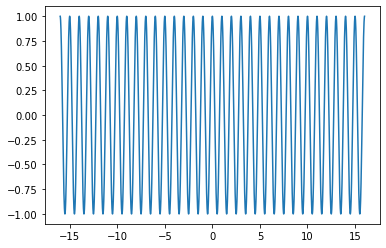

In [191]:
plt.plot(x,y)

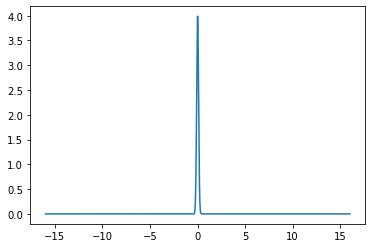

In [192]:
h = scipy.stats.norm(loc=0.,scale=0.1).pdf(x)
plt.plot(x,h)

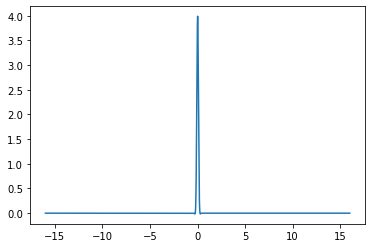

In [193]:
y1 = y*h
plt.plot(x,y1)

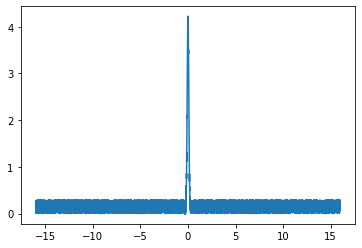

In [194]:
n = 0.3*np.random.random(y.shape[0])
y2= y1+n
plt.plot(x,y2)

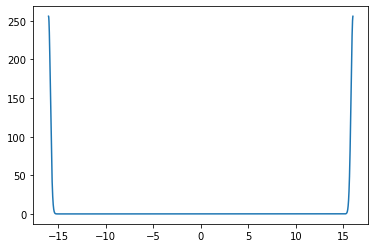

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


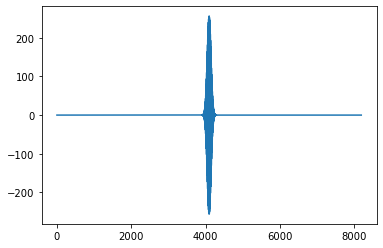

In [195]:
fh = scipy.fft.fft(h)
plt.plot(x,np.abs(fh))
plt.show()
fh = scipy.fft.fftshift(fh)
plt.plot(fh)
plt.show()

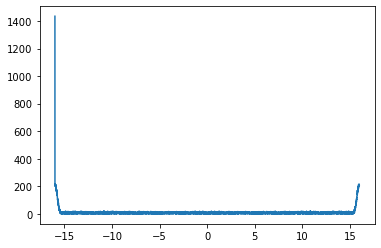

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


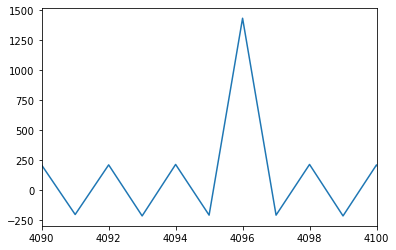

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


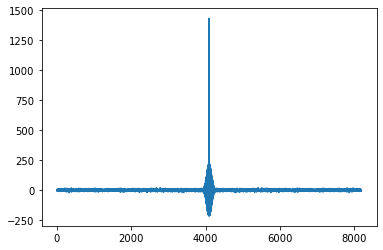

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


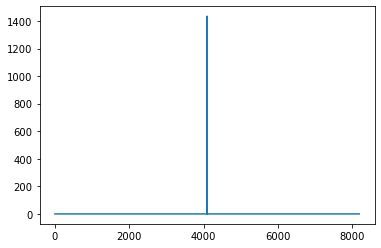

In [196]:
fy3 = scipy.fft.fft(y2)
plt.plot(x,np.abs(fy3))
plt.show()
fy3 = scipy.fft.fftshift(fy3)
plt.plot(fy3)
plt.xlim(4090,4100)
plt.show()
plt.plot(fy3)
plt.show()
fy3[np.where(fy3<1000)] = 0
plt.plot(fy3)
plt.show()
# fy3 = fy3/sample_rate

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


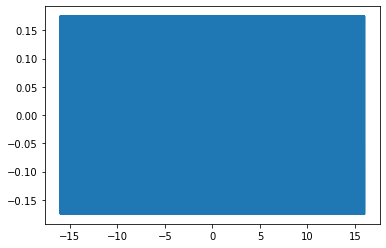

In [197]:
new_sig = scipy.fft.ifft(fy3)
plt.plot(x,new_sig)
# plt.plot(x,y)

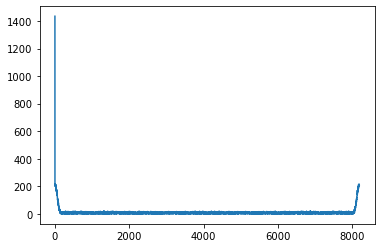

In [198]:
fy4 = scipy.fft.fft(y2)
plt.plot(np.abs(fy4))
plt.show()

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


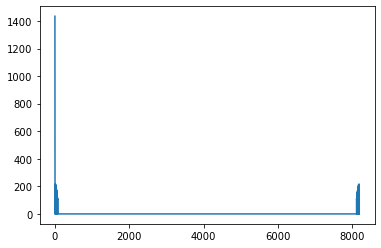

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


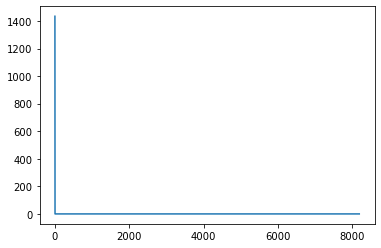

In [199]:
fy4[np.where(fy4<100)] = 0
plt.plot(fy4)
plt.show()
# print(np.where(fy3!=fy3.max()))
fy4[np.where(fy4!=fy4.max())] = 0
plt.plot(fy4)

/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


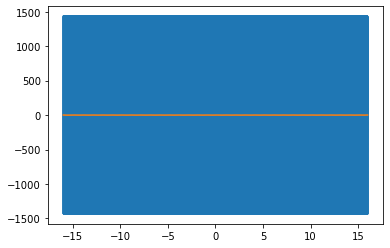

In [200]:
new_sig4 = scipy.fft.ifft(fy4)
plt.plot(x,new_sig*8192)
plt.plot(x,y)

(256+0j)


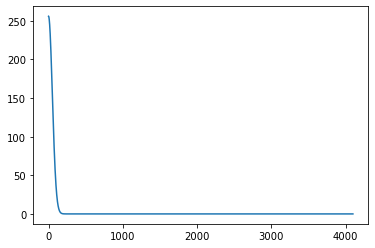

In [201]:
hf = scipy.fft.rfft(h)
plt.plot(np.abs(hf))
print(hf[0])
k=int(8192/2)

(1434.0082471786354+0j)


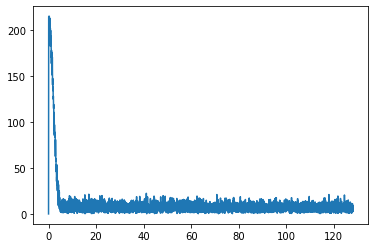

10


/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


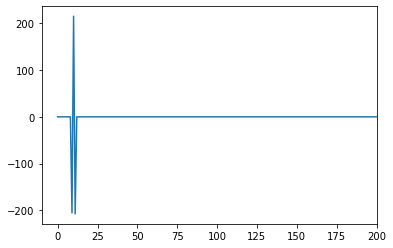

(array([ 9, 10, 11]),)


/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


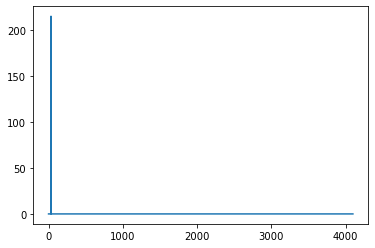

In [233]:
rate = 8
N = sample_rate * duration
yf = scipy.fft.rfft(y2)
xf = scipy.fft.rfftfreq(N, 1/sample_rate)
print(yf[0])
yf[0] = 0
plt.show()
plt.plot(xf,np.abs(yf))
# plt.xlim(left=-10 ,right=200)
plt.show()
idx = np.where(np.abs(yf)==np.abs(yf).max())[0][0]
print(idx)
yf[:idx-1] = 0
yf[idx+2:] = 0
plt.xlim(left=-10 ,right=200)
plt.plot(yf)
plt.show()

print(np.nonzero(yf))
k = 23
yf[idx+k] = yf[idx]
yf[:idx+k], yf[idx+k+1:] = 0, 0
plt.plot(yf)

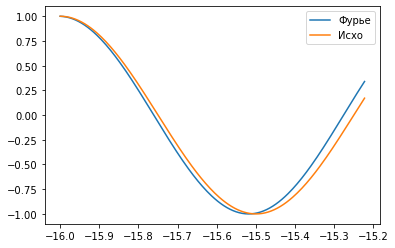

In [234]:
s = scipy.fft.irfft(yf)
s *= 1/np.max(s)

plt.plot(x[:200],s[:200],label = 'Фурье')
plt.plot(x[:200],y[:200],label = 'Исхо')
plt.legend()
plt.show()

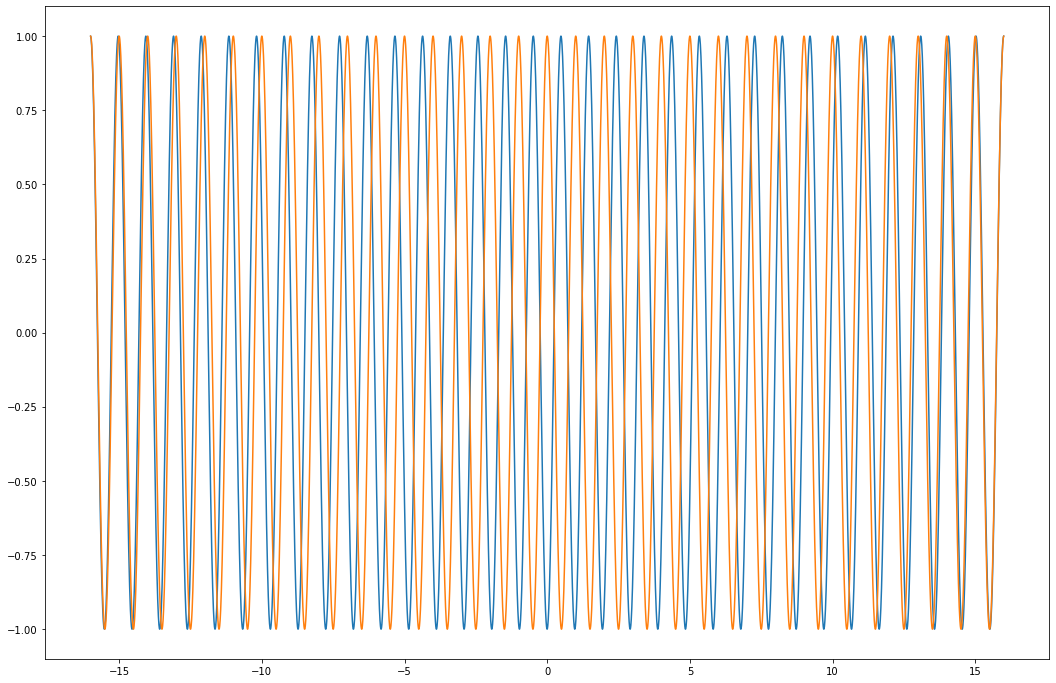

In [235]:
plt.figure(figsize=(18,12))
s = scipy.fft.irfft(yf)
dw1 = 1/np.max(s)
s *= 1/np.max(s)
plt.plot(x,s)
plt.plot(x,y)

In [205]:
dw1

19.02982244357597

In [206]:
2*np.pi*(xf[2] - xf [1])

0.19634954084936207

In [207]:
1/(xf[3]-xf[2])

32.0

In [208]:
1/dw2

256.0